### Academic honesty statement



**This is an exam problem. You are required to be in class to work on this. By turning this in you certify that it is your own work and you have not received any unauthorized assistance.**

Place your academic honesty statement here. Here are some acceptable examples.

-   I worked alone on this assignment.
-   I worked with <span class="underline"><span class="underline"><span class="underline"><span class="underline">\_\_</span></span></span></span> on this assignment.”
-   I received assistance from <span class="underline"><span class="underline"><span class="underline"><span class="underline">\_</span></span></span></span> on this assignment.



### Bessel equation solutions



Bessel's equation comes up in many scientific applications including heat conduction and vibrations:

$x^2 y'' + x y' + (x^2 - 1) y = 0, y(0) = 0, y'(0) = 0.5$

Use solve\_ivp to get a solution to this equation over the range of x=0 to x=10. Plot your solution. Note there is a singularity at the initial condition for x=0. This is a little tricky to handle. The best way to handle this is with a conditional statement like this when you define the derivatives:



In [1]:
dydx = 0.5 if x==0.0 else (expression for your derivative)

There is a known solution to this ODE, which is called a Bessel function of the first kind of order 1. This function exists in scipy and can be used like this.



In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.special import j1

x = np.linspace(0, 10)
Y = j1(x)
plt.plot(x, Y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bessel function of first kind, order=1')

Determine if this function satisfies the Bessel equation. You should try to show that it solves the equation over the whole range if possible. Explain your reasoning for how you do this. Note that I want to see numerical evidence that it is a solution.



### solution



The Bessel equation is a second order ODE, so we have to convert it to a system of first order ODEs. First divide through by $x^2$ which gets us to

$y'' + y'/x + (x^2 - 1)/x^2 y = 0$

Next, let $v = y'$, so $v' == y''$ then solve for $y''$

$y'' = -y'/x - (x^2 - 1)/x^2 * y$

This leads to the following set of FODEs:

$v' = y'' = -v / x - (x^2 - 1) / x^2 y$

$y' = v$

with $y(0) = 0, v(0)=0.5$.

There is a singularity for $x=0$, so we have to introduce a conditional statement on $v'$ to handle that. In the problem statement, I gave an example of how to do this. The value of dvdx should have been 0.0 at x=0, not 0.5, but this is an unimportant error, you get practically the same answer with both approaches.



# Out [31]:


# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

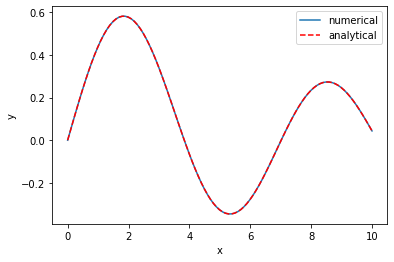

In [1]:
from scipy.integrate import solve_ivp

def sysode(x, Y):
    v, y = Y
    dvdx = 0.0 if x == 0 else  -v / x - (x**2 - 1) / x**2 * y
    dydx = v
    return (dvdx, dydx)

v0 = 0.5
y0 = 0
X0 = (v0, y0)
xspan = (0, 10)

sol = solve_ivp(sysode, xspan, X0, max_step=0.1)

from scipy.special import j1

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(sol.t, sol.y[1])
plt.plot(sol.t, j1(sol.t), 'r--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['numerical', 'analytical'])

To verify one of these is a solution, it is necessary to show that the ODE is satisfied. You can do this from your numerical solution like this:



# Out [33]:
# text/plain
Text(0, 0.5, 'LHS of ODE')

# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

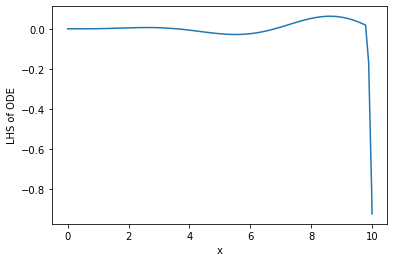

In [1]:
import numpy as np

x = sol.t
Y = sol.y[1]

YP = np.gradient(Y, x, edge_order=2)
YPP = np.gradient(YP, x, edge_order=2)
plt.plot(x, x**2 * YPP + x * YP + (x**2 - 1) * Y)
plt.xlabel('x')
plt.ylabel('LHS of ODE')

We can see that the equation evaluates to near zero over most of the range, up until the last data point. There are some minor wiggles due to the discretization and integration errors. Those should decrease as the number of points increases. The large error at the end is a feature of approximating the end-point. This is a feature of the numerical derivatives.

Alternatively, you can do this on the function j1. It is important to pick a reasonable dx for this approach. If you make it much smaller than 1e-4 you will see the noise gets larger. Here it is evident the LHS evaluates very close to zero.



# Out [59]:
# text/plain
Text(0, 0.5, 'LHS of ODE')

# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

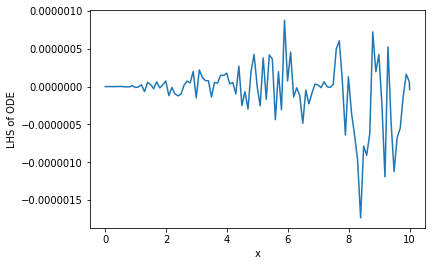

In [1]:
from scipy.misc import derivative
Y = j1(x)
YP = derivative(j1, x, dx=1e-4)
YPP= derivative(j1, x, dx=1e-4, n=2)

plt.plot(x, x**2 * YPP + x * YP + (x**2 - 1) * Y)
plt.xlabel('x')
plt.ylabel('LHS of ODE')

Finally, we could take the following approach. Scipy also provides a function for the derivative of the Bessel functions. The jvp function ([https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.jvp.html#scipy.special.jvp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.jvp.html#scipy.special.jvp)) provides this. So, we can compute



# Out [53]:
# text/plain
Text(0, 0.5, 'LHS of ODE')

# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

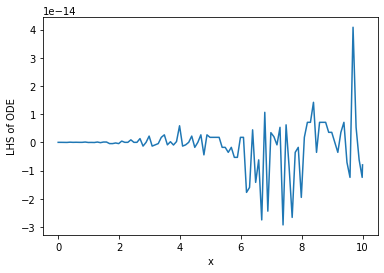

In [1]:
from scipy.special import jvp
Y = j1(x)
YP = jvp(1, x, 1)
YPP = jvp(1, x, 2)
plt.plot(x, x**2 * YPP + x * YP + (x**2 - 1) * Y)
plt.xlabel('x')
plt.ylabel('LHS of ODE')

#### An approach to solve this ODE that does not work without care



A common trick to avoid the singularity at x=0 is to start a small distance away from zero. That doesn't quite work here unless you also adjust the initial conditions on y. To see why,

let $x=a$, and assume that $y = 0.5 * x$ near x=0 (this is limiting behavior of the Bessel function). We assume $a$ is very small, so that a\*\*2 << 1.

then $dvdx = -0.5 / a + 1/a**2*0.5a$

$= -0.5 / a + 0.5 / a = 0$

However, if you let $y=0$ here, the second term does not cancel the first term and instead you get dvdx = -0.5 / a, which will be a large negative number, which is shown here.



In [1]:
from scipy.integrate import solve_ivp

def sysode(x, Y):
    v, y = Y
    dvdx = -v / x - (x**2 - 1) / x**2 * y
    dydx = v
    return (dvdx, dydx)

v0 = 0.5
y0 = 0
X0 = (v0, y0)

dvdt, dydx = sysode(1e-9, X0)
dvdt

# Out [3]:
# text/plain
-499999999.99999994

You can see there is a catastrophic error here, and dvdx is not close to zero at all. That happens because we do not get the cancellation we need when y=0 in the sum. If you try this, you find that the answer is not good.



# Out [60]:
# text/plain

# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

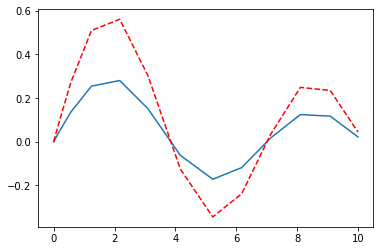

In [1]:
X0 = (v0, y0)
xspan = (1e-9, 10)
sol = solve_ivp(sysode, xspan, X0)

from scipy.special import j1

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(sol.t, sol.y[1])
plt.plot(sol.t, j1(sol.t), 'r--')

To fix this, we have to adjust the value of y at the initial condition. This shows that we get the correct value for dvdt by doing this.



In [1]:
dvdt, dydt = sysode(1e-9, (0.5, 0.5e-9))
dvdt

# Out [61]:
# text/plain
0.0

Then, we get a better answer.



# Out [64]:
# text/plain

# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

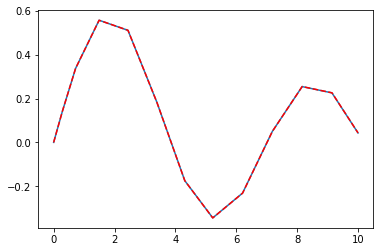

In [1]:
xspan = (1e-9, 10)
X0 = (0.5, 0.5e-9)

sol = solve_ivp(sysode, xspan, X0)


from scipy.special import j1


%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(sol.t, sol.y[1].T)
plt.plot(sol.t, j1(sol.t), 'r--')

This problem illustrates how important it is to evaluate the correctness of your answers. In other problems, it is sometimes fine to start a small bit away from zero, and the answer is just fine. In this particular problem though, there is a critical cancellation that has too occur that coincidentally doesn't occur for this particular set of initial conditions. Whenever you make approximations to deal with singularities, you have to be very careful that they don't affect your answer.

